オルンシュタイン＝ウーレンベック過程について、解析解から生成するパスとEuler-Maruyama法から生成するパスの違いが無いかをチェックする

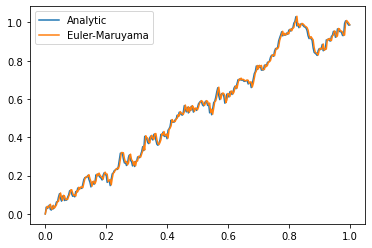

In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

theta = 1
sigma = 0.3
mu = 1.2
Xzero = 0

T = 1
n = 300
dt = T / n

partition = [i * dt for i in range(n + 1)]

random_increments = np.random.normal(loc=0, scale=np.sqrt(dt), size=n)



#こっちが解析解
Xtrue = np.zeros(n+1)
for i, t in zip(range(1,n+1), partition[1:n+2]):
    Xtrue[i] = Xzero * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t)) + sigma * sum([np.exp((-theta * (t - u))) * dB for u, dB in zip(partition[0:i+1], random_increments[0:i+1])])

#こっちがEuler-Maruyama法
Xem = np.zeros(n+1)
Xtemp = Xzero
Xem[0] = Xtemp
for i, dB in zip(range(1,n+1), random_increments):
    Xtemp = Xtemp - theta * (Xtemp - mu) * dt + sigma * dB
    Xem[i] = Xtemp

plt.plot(partition, Xtrue, label='Analytic')
plt.plot(partition, Xem, label='Euler-Maruyama')
plt.legend()